# Data Preparation

In [ ]:
# The carseats dataset contains following columns:

## $ Sales : num - Unit sales (in thousands) at each location
## $ CompPrice : num - Price charged by competitor at each location
## $ Income : num - Community income level (in thousands of dollars)
## $ Advertising: num - Local advertising budget for company at each location (in thousands of dollars)
## $ Population : num - Population size in region (in thousands)
## $ Price : num - Price company charges for car seats at each site
## $ ShelveLoc :  "Bad","Good","Medium" -  
   #### the quality of the shelving location for the car seats at each site
## $ Age : num - Average age of the local population
## $ Education : num - Education level at each location
## $ Urban : "No","Yes" - indicates whether the store is in an urban or rural location
## $ US :  "No","Yes" - indicates whether the store is in the US or not

In [44]:
#@title Data load from GitHub
# Load a csv file from GitHub by coping a raw csv link
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Carseats.csv'
df = pd.read_csv(url)
df.shape

(400, 12)

In [45]:
#@title Checking data
# First 5 rows
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   400 non-null    int64  
 1   Sales        400 non-null    float64
 2   CompPrice    400 non-null    int64  
 3   Income       400 non-null    int64  
 4   Advertising  400 non-null    int64  
 5   Population   400 non-null    int64  
 6   Price        400 non-null    int64  
 7   ShelveLoc    400 non-null    object 
 8   Age          400 non-null    int64  
 9   Education    400 non-null    int64  
 10  Urban        400 non-null    object 
 11  US           400 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


In [47]:
df.describe()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,115.614301,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,1.000000,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,100.750000,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,200.500000,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,300.250000,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,400.000000,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [48]:
# Removing the first variable
df = df.drop(['Unnamed: 0'],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [49]:
#@title Preparing data

# Calculating the 3rd quartile of 'Sales'
sales3q = df['Sales'].quantile(q=0.75)
print(sales3q)

9.32


In [50]:
# Creating a new variable HighSales based on the value of the 3rd quartile of 'Sales'
# This variable will be used as the outcome (class) variable
df['HighSales'] = np.select([df['Sales'] > sales3q, df['Sales'] <= sales3q], [1, 0])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
 11  HighSales    400 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


In [52]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,HighSales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [53]:
# Checking balance
df['HighSales'].value_counts()

0    301
1     99
Name: HighSales, dtype: int64

In [54]:
df['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [55]:
# Removing the Sales variable, becuse it was used for creating HighSales
df = df.drop(['Sales'],axis=1)

In [56]:
# Simple 'encoding' categorical variables (without using some encoder library)
# In this way, we can ensure the correct scale for bad/medium/good (1/2/3)
scale_mapper = {"Bad":1, "Medium":2, "Good":3}
df['ShelveLoc']= df['ShelveLoc'].replace(scale_mapper)

In [57]:
# Encoding categorical variables
scale_mapper = {"Yes":1, "No":0}
df['Urban']= df['Urban'].replace(scale_mapper)
df['US']= df['US'].replace(scale_mapper)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int64
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int64
 9   US           400 non-null    int64
 10  HighSales    400 non-null    int64
dtypes: int64(11)
memory usage: 34.5 KB


In [59]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,HighSales
0,138,73,11,276,120,1,42,17,1,1,1
1,111,48,16,260,83,3,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,1,38,13,1,0,0


In [15]:
# Checking null values
df.isnull().any()

CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
HighSales      False
dtype: bool

In [60]:
#@title Checking normality
# If numeric variables follow normal distribution can be checked for instance using visual inspection
# or a normality test such as shapiro test (good for small sample sizes, e.g. n < ~2000)

from scipy.stats import shapiro

# Columns without the class/output
columns =  df.columns[:-1]

# Checking if numeric variables follow normal distribution
for i in columns:    
    print(i)
    # normality test
    stat, p = shapiro(df[i])
    print('\n(W)= %e,\n p = %e' % ( stat, p ))     

    if p > 0.05:        
        print('\nSample looks Gaussian\n')
    else:        
        print('\nSample does not look Gaussian\n')

CompPrice

(W)= 9.984320e-01,
 p = 9.771953e-01

Sample looks Gaussian

Income

(W)= 9.610952e-01,
 p = 8.394546e-09

Sample does not look Gaussian

Advertising

(W)= 8.735352e-01,
 p = 1.491620e-17

Sample does not look Gaussian

Population

(W)= 9.520076e-01,
 p = 4.081858e-10

Sample does not look Gaussian

Price

(W)= 9.959165e-01,
 p = 3.903133e-01

Sample looks Gaussian

ShelveLoc

(W)= 7.995145e-01,
 p = 6.896513e-22

Sample does not look Gaussian

Age

(W)= 9.567194e-01,
 p = 1.864130e-09

Sample does not look Gaussian

Education

(W)= 9.241966e-01,
 p = 2.426367e-13

Sample does not look Gaussian

Urban

(W)= 5.722696e-01,
 p = 3.852557e-30

Sample does not look Gaussian

US

(W)= 6.051938e-01,
 p = 3.344246e-29

Sample does not look Gaussian



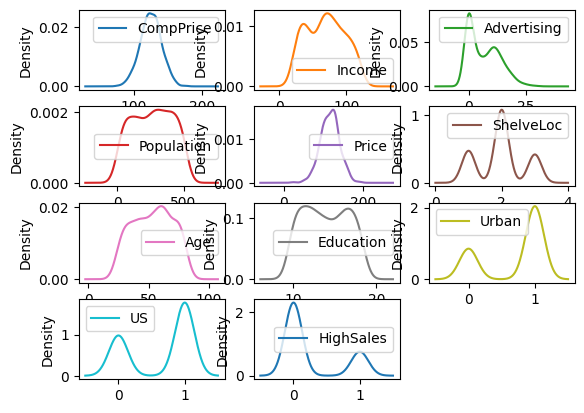

In [61]:
# Univariate Plots (Density Plots)
from matplotlib import pyplot

df.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
pyplot.show()

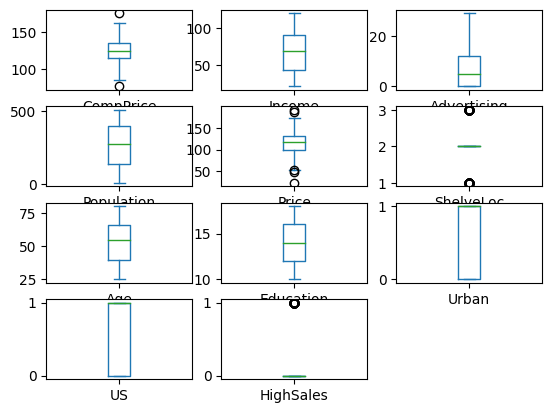

In [62]:
# Exploring outliers
df.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
pyplot.show()

In [ ]:
# Visualizing outliers
# Outliers 
  # Outlier is a data point that differs significantly from other observations
  # Outlier may be due to variability in the measurement or it may indicate experimental error
  # Outliers are sometimes excluded from the data set
sns.pairplot(data = df, hue="HighSales", palette="hls");

Output hidden; open in https://colab.research.google.com to view.

In [63]:
#@title Fixing up data outliers


# There are different outlier detection techniques such as:
# Hypothesis Testing
# Z-score method
# Robust Z-score
# I.Q.R method
# Winsorization technique (Percentile Capping)
# etc.

# Capping using Percentile technique (Winsorization technique)
# It replaces the extreme values with a specific percentile of data, typically
# 95% for overly high values and 5th percentile for overly low values.
import scipy.stats as stats

def percentile_capping(df, cols, from_low_end, from_high_end):
    
    for col in cols:
        
#         lower_bound = df[col].quantile(from_low_end)
#         upper_bound = df[col].quantile(1-from_high_end)
        
#         df[col] = np.where(df[col]>upper_bound, upper_bound,
#                  np.where(df[col]<lower_bound, lower_bound, df[col]))

        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [64]:
# Here, only outliers in normaly distributed variables are fixed.

features = ['CompPrice','Price']

# fourth argument of 0.01 from right end is equivalent to saying
# 1-0.01 = 0.99 quantile from the left end
percentile_capping(df, features, 0.05, 0.05)

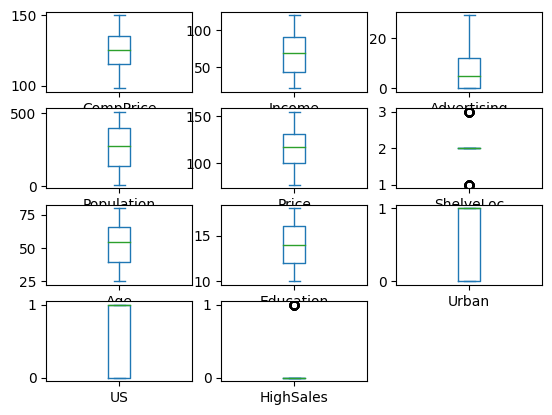

In [65]:
# Checking outliers in Price and CompPrice after percentile capping
df.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
pyplot.show()

In [66]:
#@title Splitting data
from sklearn.model_selection import train_test_split

# Spliting x axis and y axis
y = df['HighSales']
x = df.drop(['HighSales'],axis=1)

# Splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

x_test.shape,y_test.shape

((120, 10), (120,))

In [67]:
# Addressing class imbalance

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Oversampling
over_sampler = RandomOverSampler(random_state=42)
x_train, y_train = over_sampler.fit_resample(x_train, y_train)
print(f"Testing target statistics: {Counter(y_train)}")

Testing target statistics: Counter({0: 213, 1: 213})


In [68]:
x_train.describe()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.00000,426.000000,426.000000,426.000000
mean,124.842723,70.553991,7.262911,256.206573,110.744131,2.138498,51.43662,13.725352,0.697183,0.694836
std,14.821325,26.955181,6.703915,146.351678,21.314072,0.690828,15.60986,2.650135,0.460017,0.461018
min,98.000000,21.000000,0.000000,10.000000,77.000000,1.000000,25.00000,10.000000,0.000000,0.000000
25%,114.000000,47.250000,0.000000,137.500000,94.000000,2.000000,39.00000,11.000000,0.000000,0.000000
50%,125.000000,70.000000,7.000000,265.000000,110.000000,2.000000,53.50000,14.000000,1.000000,1.000000
75%,136.750000,91.000000,13.000000,365.000000,126.750000,3.000000,62.00000,16.000000,1.000000,1.000000
max,150.000000,120.000000,26.000000,509.000000,155.000000,3.000000,80.00000,18.000000,1.000000,1.000000


In [69]:
#@title Data Rescaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

# When	variables	are	in	incomparable	units	and/or	the	numeric	values	are	on	very different	
# scales	of	magnitude,	they	should	be	rescaled.

# (1) Normalization	can be used when there are no outliers.
# Normalization - reducing variable values to a common value range, typically [0,1]; this is often done using the formula:
# Z = (X - min(X))/(max(X) - min(X))
# sklearn.preprocessing.normalize

# (2) Standardization - rescaling variables so that their mean = 0 and SD = 1. For the variable X that is
# normally distributed, this is done by computing:
# Z = (X - mean(X))/SD(X)
# sklearn.preprocessing.StandardScaler

# Normalization is a special case of min-max scaling (sklearn.preprocessing MinMaxScaler). 
# Normalization should be avoided if (numerical) variables have outliers.
# Standardization is somewhat less affected by the presence of outliers. However, the outliers
# have an influence when computing the empirical mean and standard deviation. 
# In the absence of outliers, either of the two can be used.

# Standardization can be helpful in cases where data follow a Gaussian distribution.
# However, this doesn’t necessarily have to be true. In addition, unlike normalization, standardization doesn’t have a bounding range.

# (3) If the variable X is not normally distributed, standardization is typically done using median and interquartile range (IQR)
# Z = (X - meadian(X))/IQR(X)
# where IQR(X) = Q3(X) − Q1(X)
# sklearn.preprocessing.RobustScaler

# (4) Log scaling computes the log of the values to compress a wide range to a narrow range.
# In other words, it helps convert a skewed distribution to a normal distribution/less-skewed distribution. 

# Data rescaling
rscaler = RobustScaler()
sscaler = StandardScaler()

# Variables that do not look normaly distributed
# Using fit_transform of RobustScaler for the training dataset
x_train[['Income','Advertising','Population','Age','Education']] = pd.DataFrame(rscaler.fit_transform(x_train[['Income','Advertising','Population','Age','Education']]),
                                                                                index=x_train[['Income','Advertising','Population','Age','Education']].index,
                                                                                columns=['Income','Advertising','Population','Age','Education'])

# Using transform of RobustScaler for the testing dataset
x_test[['Income','Advertising','Population','Age','Education']] = pd.DataFrame(rscaler.transform(x_test[['Income','Advertising','Population','Age','Education']]),
                                                                                index=x_test[['Income','Advertising','Population','Age','Education']].index,
                                                                                columns=['Income','Advertising','Population','Age','Education'])


# Variables that do look normaly distributed
# Using fit_transform of StandardScaler for the training dataset
x_train[['CompPrice','Price']] = pd.DataFrame(sscaler.fit_transform(x_train[['CompPrice','Price']]),
                                              index=x_train[['CompPrice','Price']].index,
                                              columns=['CompPrice','Price'])

# Using transform of StandardScaler for the testing dataset
x_test[['CompPrice','Price']] = pd.DataFrame(sscaler.transform(x_test[['CompPrice','Price']]),
                                             index=x_test[['CompPrice','Price']].index,
                                             columns=['CompPrice','Price'])

In [ ]:
# Alternative: Using ColumnTransformer for data rescaling
# Data rescaling of variables that do not follow the Gaussian distribution
# from sklearn.preprocessing import RobustScaler
# from sklearn.compose import ColumnTransformer

# col_names_robust = ['Income','Advertising','Population','Age','Education']

#ct_robust = ColumnTransformer([
#        ('Robust scaler transformation', RobustScaler(), col_names_robust)
#    ], remainder='passthrough')

# Conducting the fitting and transformations and puting the results into the x_train and x_test
# x_train[col_names_robust] = pd.DataFrame(ct_robust.fit_transform(x_train[col_names_robust]),
#                                         index=x_train[col_names_robust].index,
#                                         columns=col_names_robust)

# x_test[col_names_robust] = pd.DataFrame(ct_robust.transform(x_test[col_names_robust]),
#                                         index=x_test[col_names_robust].index,
#                                         columns=col_names_robust)


In [ ]:
# Data rescaling of variables that follow the Gaussian distribution
# from sklearn.preprocessing import StandardScaler

# col_names_standard = ['CompPrice','Price']

# ct_standard = ColumnTransformer([
#        ('Standard scaler transformation', StandardScaler(), col_names_standard)
#    ], remainder='passthrough')


# Conducting the fitting and transformations and puting the results into the x_train and x_test
# x_train[col_names_standard] = pd.DataFrame(ct_standard.fit_transform(x_train[col_names_standard]),
#                                         index=x_train[col_names_standard].index,
#                                         columns=col_names_standard)

# x_test[col_names_standard] = pd.DataFrame(ct_standard.transform(x_test[col_names_standard]),
#                                         index=x_test[col_names_standard].index,
#                                         columns=col_names_standard)

In [70]:
x_train.describe()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,4.260000e+02,426.000000,426.000000,426.000000,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000
mean,2.126624e-16,0.012663,0.020224,-0.038652,2.001529e-16,2.138498,-0.089712,-0.054930,0.697183,0.694836
std,1.001176e+00,0.616118,0.515686,0.643304,1.001176e+00,0.690828,0.678690,0.530027,0.460017,0.461018
min,-1.813217e+00,-1.120000,-0.538462,-1.120879,-1.585047e+00,1.000000,-1.239130,-0.800000,0.000000,0.000000
25%,-7.324225e-01,-0.520000,-0.538462,-0.560440,-7.865141e-01,2.000000,-0.630435,-0.600000,0.000000,0.000000
50%,1.062401e-02,0.000000,0.000000,0.000000,-3.495373e-02,2.000000,0.000000,0.000000,1.000000,1.000000
75%,8.043328e-01,0.480000,0.461538,0.439560,7.518361e-01,3.000000,0.369565,0.400000,1.000000,1.000000
max,1.699366e+00,1.142857,1.461538,1.072527,2.078810e+00,3.000000,1.152174,0.800000,1.000000,1.000000


# KNN

In [72]:
#@title KNN 1 - random K
from sklearn.neighbors import KNeighborsClassifier

# Initializing KNN with K=10
knn1 = KNeighborsClassifier(n_neighbors=10)

# Fitting the model
knn1 = knn1.fit(x_train,y_train)

In [73]:
#@title KNN 1 Evaluation
from sklearn.metrics import classification_report

# Predicting a class / outcome using test data
y_pred1 = knn1.predict(x_test)

# Printing classification report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        88
           1       0.49      0.66      0.56        32

    accuracy                           0.73       120
   macro avg       0.67      0.70      0.68       120
weighted avg       0.76      0.72      0.74       120



In [74]:
from sklearn.metrics import confusion_matrix

# Calculating confusion matrix
confusion_matrix(y_test, y_pred1)

array([[66, 22],
       [11, 21]])

In [75]:
from sklearn import metrics
# Compute evaluation metrics:
# accuracy = (TP + TN) / N
# precision = TP / (TP + FP)
# recall = TP / (TP + FN)
# F1 = (2 * precision * recall) / (precision + recall)
# Note: precision and recall are inversely proportional to each other.

# Accuracy
knn1_accuracy = metrics.accuracy_score(y_test, y_pred1)

# Precision
knn1_precision = metrics.precision_score(y_test, y_pred1)

# Recall
knn1_recall = metrics.recall_score(y_test, y_pred1)

# F1
knn1_f1 = metrics.f1_score(y_test, y_pred1)

print("DTC1 accuracy: ", knn1_accuracy,
      "\nDTC1 precision: ", knn1_precision,
      "\nDTC1 recall: ", knn1_recall,
      "\nDTC1 F1: ", knn1_f1)

DTC1 accuracy:  0.725 
DTC1 precision:  0.4883720930232558 
DTC1 recall:  0.65625 
DTC1 F1:  0.5599999999999999


In [76]:
#@title KNN 2 - Hyperparameter tuning - No CV
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


tt = {}
il = []
auc=[]

# Looking for the best K value by getting Receiver Operating Characteristic Accuracy for each K ranging from 1 to 100
for  i in range(1,100):  
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  il.append(i)
  auc.append(sklearn.metrics.roc_auc_score(y_test,y_pred))
  tt.update({'K':il})
  tt.update({'ROC_AUC':auc})
 
  vv = pd.DataFrame(tt)

vv_sorted = vv.sort_values('ROC_AUC',ascending=False,ignore_index=True)

vv_sorted.head(10)

,K,ROC_AUC
0,15,0.819602
1,16,0.799716
2,99,0.792614
3,89,0.792614
4,61,0.792614
5,79,0.792614
6,19,0.791193
7,74,0.788352
8,75,0.788352
9,55,0.788352


Text(0, 0.5, 'ROC_AUC')

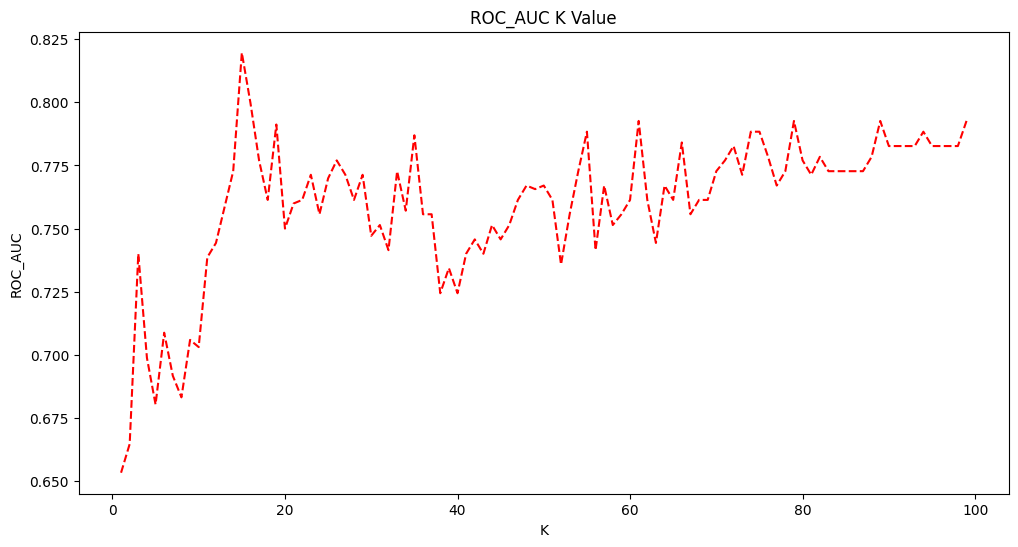

In [77]:
# Plotting 
y_plt = vv['ROC_AUC']
x_plt = vv['K']
plt.figure(figsize=(12, 6))
plt.plot(x_plt, y_plt, color='red', linestyle='dashed')
plt.title('ROC_AUC K Value')
plt.xlabel('K')
plt.ylabel('ROC_AUC')

In [78]:
from sklearn.neighbors import KNeighborsClassifier

# Initializing KNN with the best K
knn2 = KNeighborsClassifier(n_neighbors=15)
# Fitting the model
knn2 = knn2.fit(x_train,y_train)

In [79]:
#@title KNN 2 Evaluation
from sklearn.metrics import classification_report

# Predicting a class / outcome using test data
y_pred2 = knn2.predict(x_test)

# Printing classification report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        88
           1       0.60      0.84      0.70        32

    accuracy                           0.81       120
   macro avg       0.77      0.82      0.78       120
weighted avg       0.84      0.81      0.82       120



In [80]:
from sklearn.metrics import confusion_matrix

# Calculating confusion matrix
confusion_matrix(y_test, y_pred2)

array([[70, 18],
       [ 5, 27]])

In [81]:
from sklearn import metrics
# Compute evaluation metrics:

# Accuracy
knn2_accuracy = metrics.accuracy_score(y_test, y_pred2)

# Precision
knn2_precision = metrics.precision_score(y_test, y_pred2)

# Recall
knn2_recall = metrics.recall_score(y_test, y_pred2)

# F1
knn2_f1 = metrics.f1_score(y_test, y_pred2)

print("DTC1 accuracy: ", knn2_accuracy,
      "\nDTC1 precision: ", knn2_precision,
      "\nDTC1 recall: ", knn2_recall,
      "\nDTC1 F1: ", knn2_f1)

DTC1 accuracy:  0.8083333333333333 
DTC1 precision:  0.6 
DTC1 recall:  0.84375 
DTC1 F1:  0.7012987012987012


In [82]:
#@title KNN 3 - Hyperparameter tuning - RandomizedSearchCV

# algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
  ## Algorithm used to compute the nearest neighbors:
     ### ‘ball_tree’ will use BallTree
     ### ‘kd_tree’ will use KDTree
     ### ‘brute’ will use a brute-force search.
     ### ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
     ### ‘ball_tree’ will use BallTree
     ### ‘kd_tree’ will use KDTree
     ### ‘brute’ will use a brute-force search.
     ### ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

# leaf_sizeint, default=30
  ## Leaf size passed to BallTree or KDTree. This can affect the speed of the construction
  ## and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

# p int, default=2
  ## Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1),
  ## and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.model_selection import RandomizedSearchCV

# Listing Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
n_neighbors = list(range(1,100))


#Converting to dictionary
param_dist = dict(leaf_size=leaf_size, n_neighbors=n_neighbors)

# Creating new KNN object
knn_temp = KNeighborsClassifier()

# Using RendomizedSearch
# By default, parameter search uses the score function of the estimator to evaluate
# a parameter setting. These are the sklearn.metrics.accuracy_score for classification
# and sklearn.metrics.r2_score for regression...
rand = RandomizedSearchCV(knn_temp, param_dist, cv=10, scoring='roc_auc', n_iter=10, random_state=5)

#Fit the model
rand_fit = rand.fit(x_train,y_train)

In [83]:
# # Creating a variable for the best model
knn3 = rand_fit.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_fit.best_params_)

Best hyperparameters: {'n_neighbors': 33, 'leaf_size': 4}


In [84]:
#@title KNN 3 Evaluation

# Predicting a class / outcome using test data
y_pred3 = knn3.predict(x_test)

# Calculating confusion matrix
confusion_matrix(y_test, y_pred3)

array([[70, 18],
       [ 8, 24]])

In [85]:
# Accuracy
knn3_accuracy = metrics.accuracy_score(y_test, y_pred3)

# Precision
knn3_precision = metrics.precision_score(y_test, y_pred3)

# Recall
knn3_recall = metrics.recall_score(y_test, y_pred3)

# F1
knn3_f1 = metrics.f1_score(y_test, y_pred3)

print("\nAccuracy: ", knn3_accuracy,
      "\nPrecision: ", knn3_precision,
      "\nRecall: ", knn3_recall,
      "\nF1: ", knn3_f1)


Accuracy:  0.7833333333333333 
Precision:  0.5714285714285714 
Recall:  0.75 
F1:  0.6486486486486486


In [86]:
#@title Comparison of metrics

df_compare = pd.DataFrame([(knn1_accuracy, knn2_accuracy, knn3_accuracy),
                    (knn1_precision, knn2_precision, knn3_precision),
                    (knn1_recall, knn2_recall, knn3_recall),
                    (knn1_f1, knn2_f1, knn3_f1)],
           columns=('KNN1 (K = 10)', 'KNN2 (K tunned - No CV)', 'KNN2 (K tunned - RandomizedSearchCV)'),
           index=('Accuracy', 'Precision', 'Recall', 'F1')
                 )

df_compare.head()

,KNN1 (K = 10),KNN2 (K tunned - No CV),KNN2 (K tunned - RandomizedSearchCV)
Accuracy,0.725000,0.808333,0.783333
Precision,0.488372,0.600000,0.571429
Recall,0.656250,0.843750,0.750000
F1,0.560000,0.701299,0.648649


In [ ]:
# Task: Try out GridSearchCV for hyperparameter tunning
# https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/